# Credit Card Fraud Detection

Link to download the dataset - [Download](https://www.kaggle.com/mlg-ulb/creditcardfraud)

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [5]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import seaborn as sb
import scipy

print('Python : {}'.format(sys.version))
print('Numpy : {}'.format(np.__version__))
print('Matplotlib : {}'.format(matplotlib.__version__))
print('Seaborn : {}'.format(sb.__version__))
print('Scipy : {}'.format(scipy.__version__))

Python : 3.6.5 (v3.6.5:f59c0932b4, Mar 28 2018, 17:00:18) [MSC v.1900 64 bit (AMD64)]
Numpy : 1.15.1
Matplotlib : 2.2.2
Seaborn : 0.8.1
Scipy : 1.1.0


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [6]:
dataset = pd.read_csv('creditcard.csv')

In [7]:
dataset.shape

(284807, 31)

In [9]:
dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

**V1** to **V28** are numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, original features and more background information about the data is not provided.

The only features which have not been transformed with PCA are 'Time' and 'Amount'.

`Time` contains the seconds elapsed between each transaction and the first transaction in the dataset.

`Amount` is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise. 

In [8]:
# Info about the dataset, number of entries & non-null values in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [10]:
dataset.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.165980e-15,3.416908e-16,-1.373150e-15,2.086869e-15,9.604066e-16,1.490107e-15,-5.556467e-16,1.177556e-16,-2.406455e-15,...,1.656562e-16,-3.444850e-16,2.578648e-16,4.471968e-15,5.340915e-16,1.687098e-15,-3.666453e-16,-1.220404e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Class is target variable, 0 = Valid transaction & 1 = for Fraudulent transaction.

Mean values of Class i.e. the target variable is 0.001727. This implies that most of the transactions are valid, only very few transactions are fradulent.

## Data Visualisation

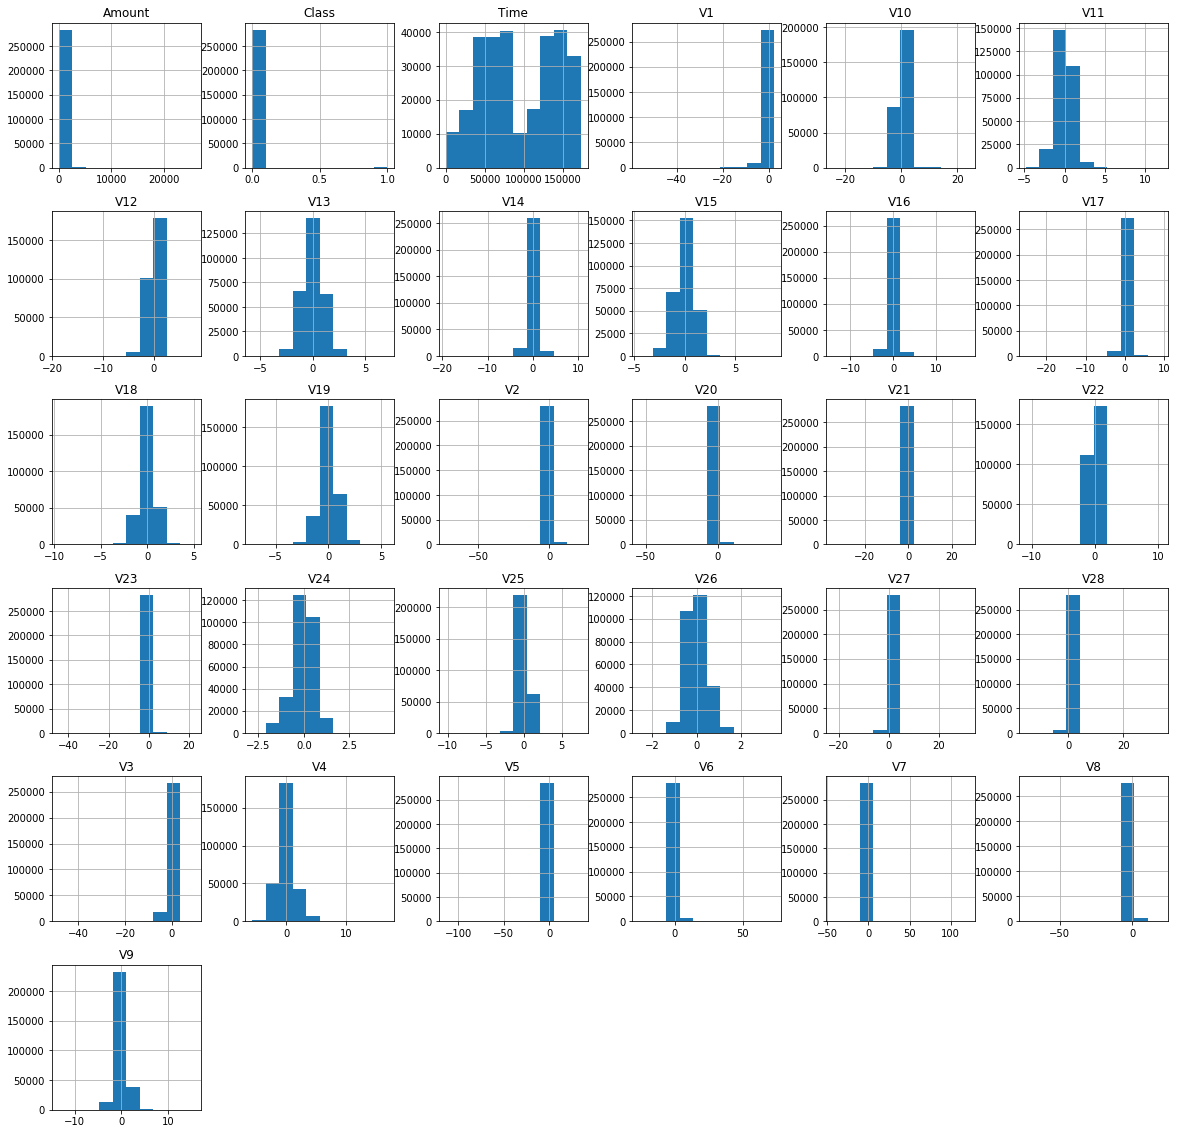

In [12]:
dataset.hist(figsize=(20,20))
plt.show()

In [16]:
fraud = dataset[dataset['Class']==1]
valid = dataset[dataset['Class']==0]

In [30]:
outlier_fraction = len(fraud)/float(len(valid))
print(outlier_fraction)
print('Fraudulent transactions = {}%'.format(len(fraud)/len(dataset)))
print('Valid transactions = {}%'.format(len(valid)/len(dataset)))

0.0017304750013189597
Fraudulent transactions = 0.001727485630620034%
Valid transactions = 0.9982725143693799%


### Standardizing the data

In [38]:
from sklearn.preprocessing import StandardScaler

dataset['normAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1, 1))
dataset = dataset.drop(['Time','Amount'],axis=1)

In [40]:
dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


## Under Sampling the data

In [47]:
# Number of Fraud Transactions
no_frauds = len(dataset[dataset['Class'] == 1])

# Indices of valid transactions to perform under sampling
non_fraud_indices = dataset[dataset.Class == 0].index

# Randomly selecting Valid transactions equal to no. of fraud transactions
random_indices = np.random.choice(non_fraud_indices,no_frauds, replace=False)

# Indices of fraud transactions
fraud_indices = dataset[dataset.Class == 1].index

# Concatenating the fraud indices & randomly selected valid transactions
under_sample_indices = np.concatenate([fraud_indices,random_indices])

# Creating new dataframe for under sampled data
dataset_US = dataset.loc[under_sample_indices]

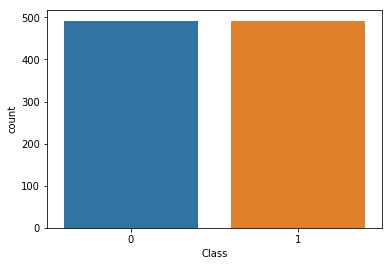

In [48]:
sb.countplot('Class',data=dataset_US)

### Correlation Matrix

In [219]:
# Correlation Matrix
CorrMat = dataset_US.corr()

In [220]:
# Generating a mask for the upper triangle
mask = np.zeros_like(CorrMat, dtype=np.bool)

# K=1 diagonal offset to include the diagonal correlation values
mask[np.triu_indices_from(mask,k=0)] = True

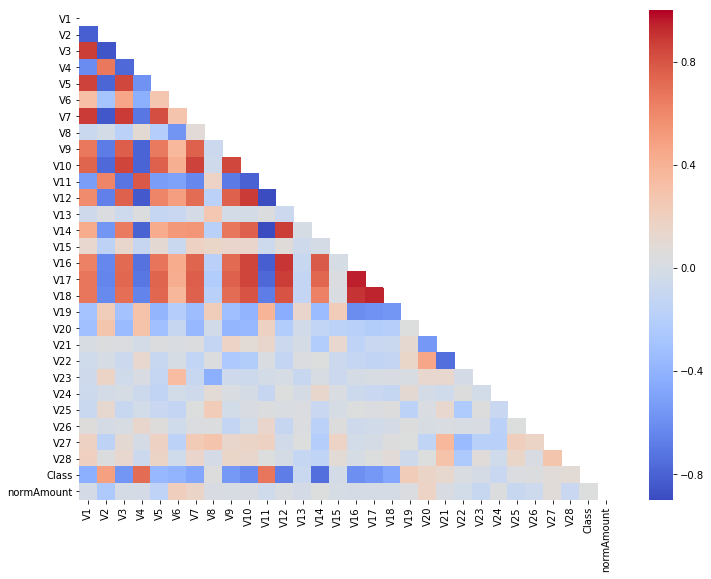

In [221]:
# Creating Figure with size (14,10)
fig=plt.figure(figsize=(12,9))

# Plotting Heatmap of correlation coefficients by masking the upper triangle of plot
sb.heatmap(CorrMat,mask=mask,cmap="coolwarm",annot=False)
plt.show()

**V12,V16,V17,V18** are found to have very high correlation coefficients (>0.9). So, we remove V12,V16,V17 & retain only V18.

Similarly,

**V1,V3,V5,V7** are found to have very high correlation coefficient (>0.85). So, we remove V3,V5,V7 & retain only V1.

**V9 & V10** are found to have high correlation coefficient (==0.85). So, we remove V9 & retain V10 (because it have high negative correlation with target variable. So, we need to retain it)

### Separating Predictors & target

In [232]:
# Getting all the columns names
cols = dataset_US.columns.tolist()

# Separating the predictor columns, as we known "Class" is target column
cols = [c for c in cols if c not in ['Class','V3','V5','V7','V9','V12','V16','V17']]

target = 'Class'

In [233]:
X = dataset_US[cols]
y = dataset_US[target]

In [234]:
print(X.shape)
print(y.shape)

(984, 22)
(984,)


### Train Test Split

In [235]:
from sklearn.model_selection import train_test_split

In [236]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

### Fraud Detection

In [237]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [238]:
classifier = LogisticRegression()

In [239]:
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [240]:
y_pred = classifier.predict(X_test)

In [241]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9353846153846154
[[155   8]
 [ 13 149]]
             precision    recall  f1-score   support

          0       0.92      0.95      0.94       163
          1       0.95      0.92      0.93       162

avg / total       0.94      0.94      0.94       325



### SVM

In [242]:
from sklearn.model_selection import GridSearchCV

In [243]:
params = {'C':[1,2,5,10,20,50,100],
         'gamma':[0.3,0.2,0.1,0.01,0.001,0.0001]}

In [244]:
classifier = GridSearchCV(SVC(),param_grid=params,verbose=3)

In [245]:
classifier.fit(X_train,y_train)

Fitting 3 folds for each of 42 candidates, totalling 126 fits
[CV] C=1, gamma=0.3 ..................................................
[CV] ......... C=1, gamma=0.3, score=0.8545454545454545, total=   0.0s
[CV] C=1, gamma=0.3 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV] ......... C=1, gamma=0.3, score=0.8227272727272728, total=   0.0s
[CV] C=1, gamma=0.3 ..................................................
[CV] ......... C=1, gamma=0.3, score=0.8310502283105022, total=   0.0s
[CV] C=1, gamma=0.2 ..................................................
[CV] ......... C=1, gamma=0.2, score=0.8772727272727273, total=   0.0s
[CV] C=1, gamma=0.2 ..................................................
[CV] ......... C=1, gamma=0.2, score=0.8590909090909091, total=   0.0s
[CV] C=1, gamma=0.2 ..................................................
[CV] ......... C=1, gamma=0.2, score=0.8904109589041096, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ......... C=1, gamma=0.1, score=0.9045454545454545, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] ....................... C=1, gamma=0.1, score=0.95, total=   0.0s
[CV] C=1, gamma=0.1 ..................................................
[CV] .

[CV] ........ C=10, gamma=0.1, score=0.9454545454545454, total=   0.0s
[CV] C=10, gamma=0.1 .................................................
[CV] ........ C=10, gamma=0.1, score=0.9041095890410958, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9136363636363637, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9636363636363636, total=   0.0s
[CV] C=10, gamma=0.01 ................................................
[CV] ....... C=10, gamma=0.01, score=0.9497716894977168, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9136363636363637, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] ...... C=10, gamma=0.001, score=0.9409090909090909, total=   0.0s
[CV] C=10, gamma=0.001 ...............................................
[CV] .

[CV] ...... C=100, gamma=0.001, score=0.958904109589041, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.9136363636363637, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.9454545454545454, total=   0.0s
[CV] C=100, gamma=0.0001 .............................................
[CV] .... C=100, gamma=0.0001, score=0.9452054794520548, total=   0.0s


[Parallel(n_jobs=1)]: Done 126 out of 126 | elapsed:    8.2s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [1, 2, 5, 10, 20, 50, 100], 'gamma': [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [246]:
classifier.best_estimator_

SVC(C=20, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [247]:
y_pred = classifier.predict(X_test)

In [248]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9353846153846154
[[154   9]
 [ 12 150]]
             precision    recall  f1-score   support

          0       0.93      0.94      0.94       163
          1       0.94      0.93      0.93       162

avg / total       0.94      0.94      0.94       325



### Random Forest Classifier

In [249]:
from sklearn.ensemble import RandomForestClassifier

In [262]:
#classifier = RandomForestClassifier(n_estimators=300)

In [281]:
params = {'n_estimators':[100,200,250,300,350]}

In [287]:
classifier = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=1,cv=10)

In [288]:
classifier.fit(X_train,y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9545454545454546, total=   0.6s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] ....... n_estimators=100, score=0.8787878787878788, total=   0.6s
[CV] n_estimators=100 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] ....... n_estimators=100, score=0.9090909090909091, total=   0.6s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9242424242424242, total=   0.6s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9545454545454546, total=   0.6s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9696969696969697, total=   0.7s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9696969696969697, total=   0.7s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9545454545454546, total=   0.6s
[CV] n_estimators=100 ................................................
[CV] ....... n_estimators=100, score=0.9545454545454546, total=   0.6s
[CV] n_estimators=100 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  1.5min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [100, 200, 250, 300, 350]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [289]:
classifier.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [290]:
y_pred = classifier.predict(X_test)

In [291]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9384615384615385
[[157   6]
 [ 14 148]]
             precision    recall  f1-score   support

          0       0.92      0.96      0.94       163
          1       0.96      0.91      0.94       162

avg / total       0.94      0.94      0.94       325

